# Assignment 3 - Flight Fare Prediction 

Name: Ronik Karki
Student ID: 24886412

#### Setting up directories and folders

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="urllib3")
# Setting the working directory
import os
os.chdir('c:\\ronik_assignment\\Flight_Fare_Prediction\\')

#### Unzipping zip files and saving them into the preprocessed folder

In [ ]:
from src.data.make_dataset import load_and_save_data_by_folder

path = 'data/raw'

# Load and save concatenated data by folder
load_and_save_data_by_folder(path)

#### Reading CSV after concatenation

In [ ]:
import pandas as pd
required_column_names = ['flightDate', 'startingAirport',
                         'destinationAirport', 'totalFare', 'totalTravelDistance',
                         'segmentsDepartureTimeRaw','segmentsDurationInSeconds',
                         'segmentsDistance', 'segmentsCabinCode']
df = pd.read_csv("data/interim/ATL/ATL_concatenated.csv", usecols=required_column_names)
df.head(5)

,flightDate,startingAirport,destinationAirport,totalFare,totalTravelDistance,segmentsDepartureTimeRaw,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,2022-04-17,ATL,BOS,248.6,947.0,2022-04-17T12:57:00.000-04:00,8940,947,coach
1,2022-04-17,ATL,BOS,248.6,947.0,2022-04-17T06:30:00.000-04:00,9000,947,coach
2,2022-04-17,ATL,BOS,248.6,947.0,2022-04-17T11:35:00.000-04:00,9000,947,coach
3,2022-04-17,ATL,BOS,248.6,947.0,2022-04-17T13:59:00.000-04:00,9120,947,coach
4,2022-04-17,ATL,BOS,248.6,947.0,2022-04-17T09:59:00.000-04:00,9240,947,coach


In [ ]:
df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'totalFare', 'totalTravelDistance',
       'segmentsDepartureTimeRaw', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode'],
      dtype='object')

In [ ]:
df_bos = pd.read_csv("data/interim/BOS/BOS_concatenated.csv", usecols=required_column_names)
df_bos.head(5)

,legId,searchDate,flightDate,startingAirport,destinationAirport,totalFare,totalTravelDistance,segmentsDepartureTimeRaw,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,7cb2e564e0aaf26f7e4e67c6aa5976fd,2022-04-16,2022-04-17,BOS,ATL,248.60,947.0,2022-04-17T14:25:00.000-04:00,10620,947,coach
1,8e983803b8063ac9afb9587e0e4ae6ba,2022-04-16,2022-04-17,BOS,ATL,248.60,947.0,2022-04-17T07:00:00.000-04:00,10740,947,coach
2,e75f8dad155b3b3380562a56f924ab78,2022-04-16,2022-04-17,BOS,ATL,300.10,947.0,2022-04-17T14:25:00.000-04:00,10620,947,coach
3,974b528e693573508ed453bb06692bef,2022-04-16,2022-04-17,BOS,ATL,300.10,947.0,2022-04-17T07:00:00.000-04:00,10740,947,coach
4,a9acbe98c9adaa0bc07992079956a4c9,2022-04-16,2022-04-17,BOS,ATL,303.61,1462.0,2022-04-17T10:22:00.000-04:00||2022-04-17T13:3...,10740||7500,862||600,coach||coach


In [ ]:
df['segmentsCabinCode'].value_counts()

segmentsCabinCode
coach||coach                           510399
coach                                  315992
coach||coach||coach                     43813
coach||coach||coach||coach               1599
coach||premium coach                      511
first||coach                              401
first                                     376
premium coach||coach                      373
premium coach                             182
coach||first                              110
premium coach||premium coach               51
premium coach||coach||coach                40
first||first                               37
coach||premium coach||coach                36
business||coach                            29
coach||business                            21
first||coach||coach                        20
coach||coach||premium coach                18
coach||coach||coach||premium coach         15
coach||coach||business                      8
coach||coach||coach||first                  7
coach||first||co

In [ ]:
# Extract dtypes
dtype_dict = df.dtypes.to_dict()

print(dtype_dict)

{'legId': dtype('O'), 'searchDate': dtype('O'), 'flightDate': dtype('O'), 'startingAirport': dtype('O'), 'destinationAirport': dtype('O'), 'totalFare': dtype('float64'), 'totalTravelDistance': dtype('float64'), 'segmentsDepartureTimeRaw': dtype('O'), 'segmentsDurationInSeconds': dtype('O'), 'segmentsDistance': dtype('O'), 'segmentsCabinCode': dtype('O')}


In [2]:
%load_ext autoreload
%autoreload 2

#### Preprocessing 

In [5]:
from src.data.ml_model_data_preprocessor import PreProcessor
preprocess = PreProcessor()
preprocess.merge_data_and_explode()

In [3]:
import pandas as pd
from src.visualization.visualize import Numerical_plots, Categorical_plots

df = pd.read_csv('data/processed/exploded_merged_data.csv')
df.head(5)

,flightDate,startingAirport,destinationAirport,totalFare,totalTravelDistance,segmentsDepartureTimeRaw,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,2022-04-17,ATL,BOS,248.6,947.0,2022-04-17T12:57:00,8940,947.0,coach
1,2022-04-17,ATL,BOS,248.6,947.0,2022-04-17T06:30:00,9000,947.0,coach
2,2022-04-17,ATL,BOS,248.6,947.0,2022-04-17T11:35:00,9000,947.0,coach
3,2022-04-17,ATL,BOS,248.6,947.0,2022-04-17T13:59:00,9120,947.0,coach
4,2022-04-17,ATL,BOS,248.6,947.0,2022-04-17T09:59:00,9240,947.0,coach


In [3]:
len(df)

39696608

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39696608 entries, 0 to 39696607
Data columns (total 9 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   flightDate                 object 
 1   startingAirport            object 
 2   destinationAirport         object 
 3   totalFare                  float64
 4   totalTravelDistance        float64
 5   segmentsDepartureTimeRaw   object 
 6   segmentsDurationInSeconds  int64  
 7   segmentsDistance           float64
 8   segmentsCabinCode          object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.7+ GB


In [5]:
df['segmentsCabinCode'].value_counts()

segmentsCabinCode
coach            39422036
first              130310
premium coach      123588
business            20674
Name: count, dtype: int64

In [6]:
numerical_features = df.select_dtypes(include='number')
numerical_features.columns

Index(['totalFare', 'totalTravelDistance', 'segmentsDurationInSeconds',
       'segmentsDistance'],
      dtype='object')

#### Exploratory Data Analysis of the combined data

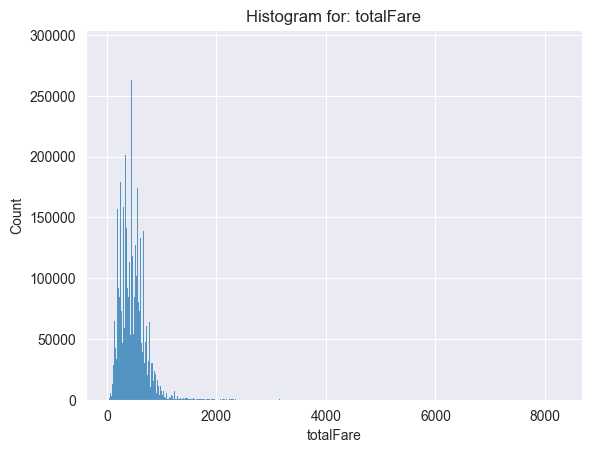

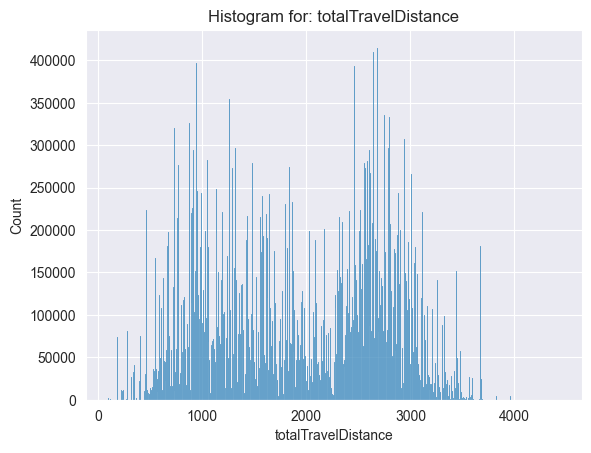

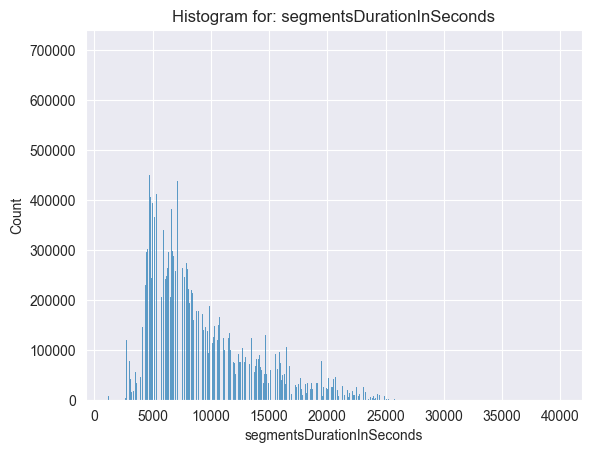

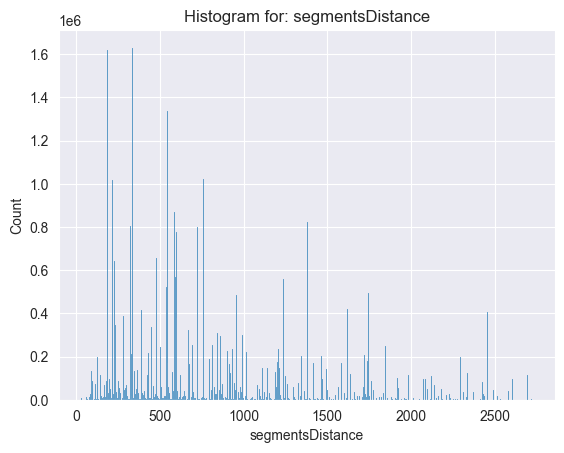

In [ ]:
for col in numerical_features.columns:
    Numerical_plots(df=df, col=col, type='histogram')

Category: startingAirport


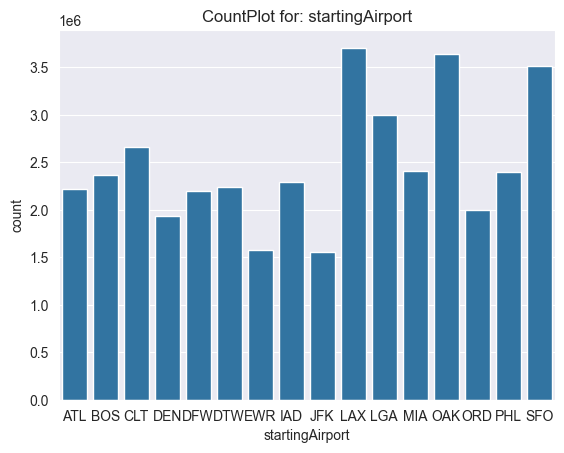

Category: destinationAirport


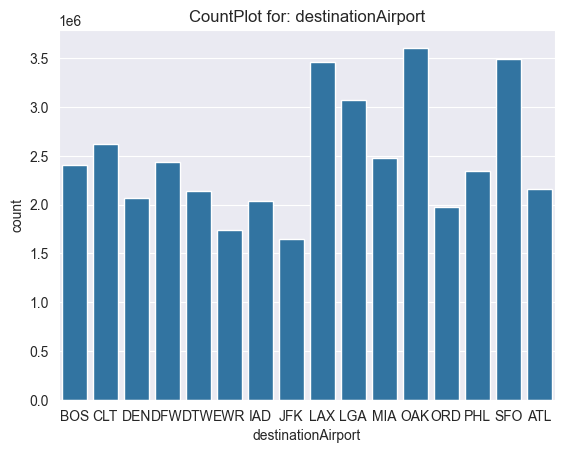

Category: segmentsCabinCode


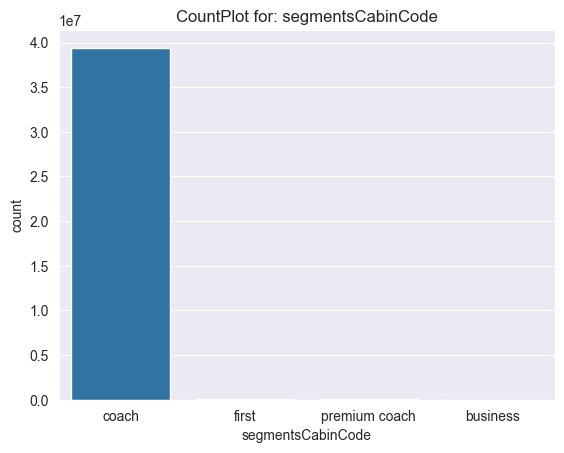

In [ ]:
from src.visualization.visualize import Categorical_plots
import seaborn as sns
import matplotlib.pyplot as plt
categorical_features = ['startingAirport', 'destinationAirport' , 'segmentsCabinCode']
for col in categorical_features:
    Categorical_plots(df=df, col=col)

In [ ]:
df[categorical_features].describe()

,startingAirport,destinationAirport,segmentsCabinCode
count,39696608,39696608,39696608
unique,16,16,4
top,LAX,OAK,coach
freq,3706600,3608281,39422036


In [7]:
df.isna().sum()

flightDate                         0
startingAirport                    0
destinationAirport                 0
totalFare                          0
totalTravelDistance          1329427
segmentsDepartureTimeRaw           0
segmentsDurationInSeconds          0
segmentsDistance             1329427
segmentsCabinCode                  0
dtype: int64

In [8]:
df[df['totalTravelDistance'].isna()]

,flightDate,startingAirport,destinationAirport,totalFare,totalTravelDistance,segmentsDepartureTimeRaw,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
68,2022-04-17,ATL,BOS,290.58,NaN,2022-04-17T05:26:00,6840,NaN,coach
69,2022-04-17,ATL,BOS,290.58,NaN,2022-04-17T05:26:00,11100,NaN,coach
70,2022-04-17,ATL,BOS,290.58,NaN,2022-04-17T08:00:00,6840,NaN,coach
71,2022-04-17,ATL,BOS,290.58,NaN,2022-04-17T08:00:00,11100,NaN,coach
125,2022-04-17,ATL,BOS,311.58,NaN,2022-04-17T13:54:00,6660,NaN,coach
...,...,...,...,...,...,...,...,...,...
39696603,2022-06-03,SFO,PHL,837.60,NaN,2022-06-03T07:30:00,6420,NaN,coach
39696604,2022-06-03,SFO,PHL,837.60,NaN,2022-06-03T07:30:00,19260,NaN,coach
39696605,2022-06-03,SFO,PHL,837.60,NaN,2022-06-03T11:19:00,6420,NaN,coach
39696606,2022-06-03,SFO,PHL,837.60,NaN,2022-06-03T11:19:00,19260,NaN,coach


In [9]:
df.drop_duplicates(subset=['flightDate'])

,flightDate,startingAirport,destinationAirport,totalFare,totalTravelDistance,segmentsDepartureTimeRaw,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,2022-04-17,ATL,BOS,248.60,947.0,2022-04-17T12:57:00,8940,947.0,coach
3230,2022-04-18,ATL,BOS,248.60,947.0,2022-04-18T11:40:00,9000,947.0,coach
6584,2022-04-19,ATL,BOS,188.60,947.0,2022-04-19T18:23:00,9840,947.0,coach
11538,2022-04-20,ATL,BOS,196.10,956.0,2022-04-20T08:20:00,5400,228.0,coach
16327,2022-04-21,ATL,BOS,196.10,956.0,2022-04-21T08:20:00,5400,228.0,coach
...,...,...,...,...,...,...,...,...,...
2168857,2022-07-13,ATL,BOS,138.58,NaN,2022-07-13T10:40:00,5340,NaN,coach
2171653,2022-07-14,ATL,BOS,138.58,NaN,2022-07-14T15:05:00,7140,NaN,coach
2174432,2022-07-15,ATL,BOS,181.58,NaN,2022-07-15T15:05:00,7140,NaN,coach
2177427,2022-07-16,ATL,BOS,161.58,NaN,2022-07-16T15:05:00,7140,NaN,coach


#### Feature engineering

In [8]:
preprocess.preprocess_data()
preprocess.preprocessed_data.head(5)

          flightDate startingAirport destinationAirport  totalFare  \
0         2022-04-17             ATL                BOS      248.6   
1         2022-04-17             ATL                BOS      248.6   
2         2022-04-17             ATL                BOS      248.6   
3         2022-04-17             ATL                BOS      248.6   
4         2022-04-17             ATL                BOS      248.6   
...              ...             ...                ...        ...   
39696603  2022-06-03             SFO                PHL      837.6   
39696604  2022-06-03             SFO                PHL      837.6   
39696605  2022-06-03             SFO                PHL      837.6   
39696606  2022-06-03             SFO                PHL      837.6   
39696607  2022-06-03             SFO                PHL     1649.6   

          totalTravelDistance segmentsDepartureTimeRaw  \
0                       947.0      2022-04-17T12:57:00   
1                       947.0      2022-04-

,startingAirport,destinationAirport,totalTravelDistance,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,year,month,day,hour,minute,Total_fare_mode
0,16,1,947.0,8940.0,947.0,1,2022,4,17,12,57,248.600006
1,16,1,947.0,9000.0,947.0,1,2022,4,17,6,30,248.600006
2,16,1,947.0,9000.0,947.0,1,2022,4,17,11,35,248.600006
3,16,1,947.0,9120.0,947.0,1,2022,4,17,13,59,248.600006
4,16,1,947.0,9240.0,947.0,1,2022,4,17,9,59,248.600006


In [43]:
preprocess.preprocessed_data.to_csv('data/processed/preprocessed_data.csv', index=False)

In [5]:
preprocess.preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39674310 entries, 0 to 39696607
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   startingAirport            int8   
 1   destinationAirport         int8   
 2   totalTravelDistance        float32
 3   segmentsDurationInSeconds  float32
 4   segmentsDistance           float32
 5   segmentsCabinCode          int8   
 6   year                       int16  
 7   month                      int8   
 8   day                        int8   
 9   hour                       int8   
 10  minute                     int8   
 11  Total_fare_mode            float32
dtypes: float32(4), int16(1), int8(7)
memory usage: 1.2 GB


In [7]:
pd.options.display.float_format = '{:.2f}'.format
preprocess.preprocessed_data.describe()

,startingAirport,destinationAirport,totalTravelDistance,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,year,month,day,hour,minute,Total_fare_mode
count,39674310.00,39674310.00,39674310.00,39674310.00,39674310.00,39674310.00,39674310.00,39674310.00,39674310.00,39674310.00,39674310.00,39674310.00
mean,8.88,8.82,1915.65,9038.58,839.95,1.01,2022.00,5.38,15.73,13.26,26.94,432.43
std,4.60,4.61,827.28,4376.28,609.00,0.14,0.00,0.73,8.79,5.25,18.66,233.49
min,1.00,1.00,97.00,1200.00,31.00,1.00,2022.00,4.00,1.00,0.00,0.00,23.97
25%,5.00,5.00,1186.00,5640.00,356.00,1.00,2022.00,5.00,8.00,9.00,10.00,269.19
50%,9.00,9.00,1907.00,7680.00,667.00,1.00,2022.00,5.00,16.00,13.00,29.00,405.10
75%,13.00,13.00,2643.00,11220.00,1142.00,1.00,2022.00,6.00,23.00,18.00,44.00,552.70
max,16.00,16.00,4430.00,39900.00,2722.00,4.00,2022.00,7.00,31.00,23.00,59.00,8260.61


#### FINDING CORRELATIONS BETWEEN THE VARIABLES

In [35]:
corr = preprocess.preprocessed_data.corr()

In [36]:
preprocess.preprocessed_data.isna().sum()

startingAirport              0
destinationAirport           0
totalTravelDistance          0
segmentsDurationInSeconds    0
segmentsDistance             0
segmentsCabinCode            0
year                         0
month                        0
day                          0
hour                         0
minute                       0
Total_fare_mode              0
dtype: int64

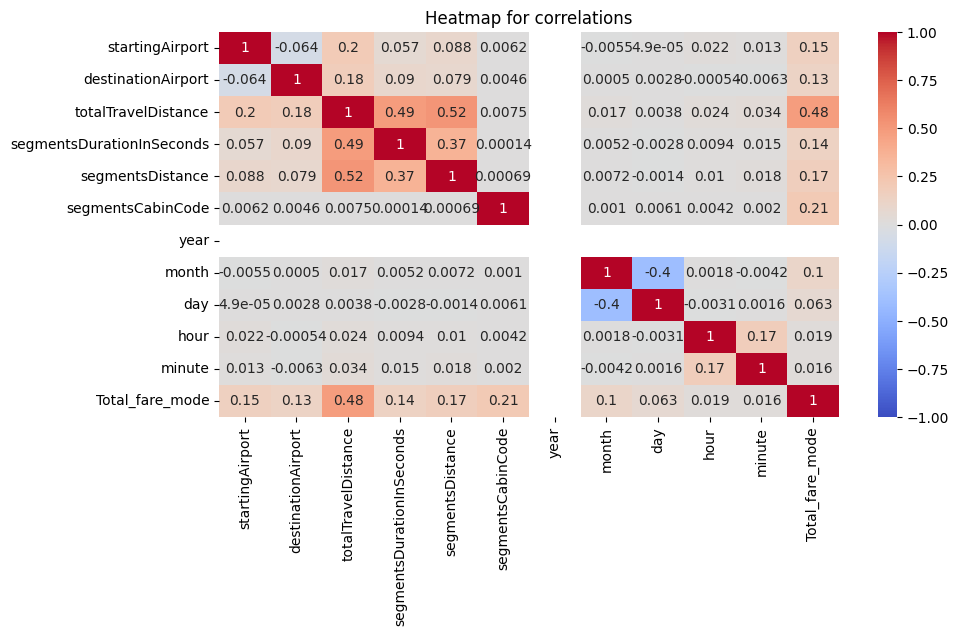

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Heatmap for correlations')

sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')
plt.show()

#### NOTE: (Observation from Data Analysis):
- totalTravelDistance and segmentsDistance had missing values.
- year shows no correlation with the flight fare.
- Coach cabin type has the most usage as it make sense that many people wont be able to afford higher class.
- LAX, OAK and SFO seems to be the busiest airport among the rest, both in terms of arrival and departure.
- travel distance has the highest correlation with the total fare.

#### MODEL GENERATION 

In [9]:
X = preprocess.preprocessed_data.drop(['Total_fare_mode'], axis=1)
y = preprocess.preprocessed_data[['Total_fare_mode']]

In [8]:
from src.models.train_model_ronik import xgboost_model

In [9]:
xgb = xgboost_model()
xgb.baseline_model(y)

SCORES FOR Baseline Model
--------------------------------------------------
Root Mean Squared error: 233.4865990897198
Mean Abscolute Error: 169.70985449421957
R2 Score: 0.0


In [76]:
xgb.cross_validate(X, y, split=5)

SCORES FOR Train Data for Fold: 0
--------------------------------------------------
Root Mean Squared error: 145.37979125976562
Mean Abscolute Error: 94.64462280273438
R2 Score: 0.6123437449786435
SCORES FOR Test Data for Fold: 0
--------------------------------------------------
Root Mean Squared error: 145.5082244873047
Mean Abscolute Error: 94.69050598144531
R2 Score: 0.6117810667272763
SCORES FOR Train Data for Fold: 1
--------------------------------------------------
Root Mean Squared error: 145.2654571533203
Mean Abscolute Error: 94.53548431396484
R2 Score: 0.6128611711079865
SCORES FOR Test Data for Fold: 1
--------------------------------------------------
Root Mean Squared error: 145.5135955810547
Mean Abscolute Error: 94.5714111328125
R2 Score: 0.6121193145604868
SCORES FOR Train Data for Fold: 2
--------------------------------------------------
Root Mean Squared error: 145.4291534423828
Mean Abscolute Error: 94.79134368896484
R2 Score: 0.6121856659534741
SCORES FOR Test D

In [77]:
xgb.train_model(X, y, save_model=True, file_name="xgboost_model.pb")

SCORES FOR Train Data
--------------------------------------------------
Root Mean Squared error: 144.89459228515625
Mean Abscolute Error: 94.54037475585938
R2 Score: 0.6149506256043868
SCORES FOR Test Data
--------------------------------------------------
Root Mean Squared error: 144.91232299804688
Mean Abscolute Error: 94.57537078857422
R2 Score: 0.614570890148226


#### USING LINEAR REGRESSION MODEL

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
xgb.train_model(X, y, save_model=False, model_name=model, file_name="xgboost_model.pb")

SCORES FOR Train DataLinearRegression()
--------------------------------------------------
Root Mean Squared error: 193.4630049778805
Mean Abscolute Error: 134.5809175741753
R2 Score: 0.3135520040440223
SCORES FOR Test DataLinearRegression()
--------------------------------------------------
Root Mean Squared error: 193.37530377201392
Mean Abscolute Error: 134.55601712553883
R2 Score: 0.31366593260329534


#### TUNING XGB MODEL (BEST MODEL)

In [187]:
xgb.tune_xgb(X, y)

100%|██████████| 25/25 [4:31:13<00:00, 650.96s/trial, best loss: 42.26374053955078]  
Best hyperparameters: {'max_depth': 15, 'learning_rate': 0.25238065315401637, 'n_estimators': 200}


In [11]:
from xgboost import XGBRegressor
model = XGBRegressor(max_depth=15, learning_rate=0.25238065315401637, n_estimators= 200)
xgb.train_model(X, y, save_model=False, model_name=model, file_name="xgb_model_tuned.pb")

SCORES FOR Train DataXGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25238065315401637,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
--------------------------------------------------
Root Mean Squared error: 62.42471687616085
Mean Abscolute Error: 40.25159197948788
R2 Score: 0.9285298085139935
SCORES FOR Test DataXGBRegressor(base_score=None, booster

#### ACTUAL VS PREDICTED PLOT

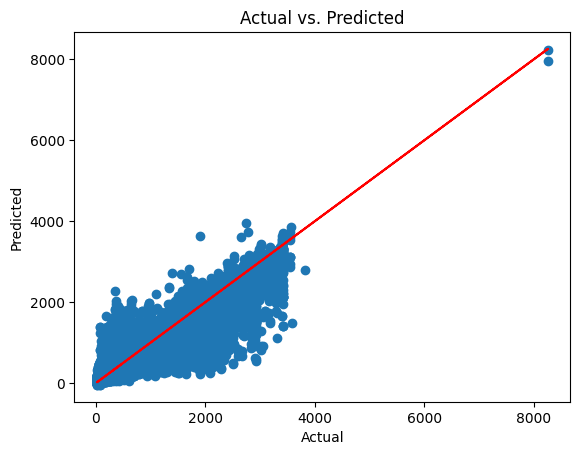

In [15]:
xgb.actual_vs_predicted(X, y)